# Estatísticas da coleção obtida de artigos do site Carta Capital.

## Importando-se os pacotes necessários para a atividade

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, OrderedDict

## Obtendo-se as palavras dos textos dos artigos

In [13]:
data_frame = pd.read_csv("results.csv")
textos_artigos = data_frame["text"].tolist()

def concatena_lista_com_texto(lista, texto):
    return lista + str(texto).split(" ")

def is_not_pontuacao(palavra):
    return palavra.strip() not in [",", ".", "!", "?", ":", "/", "#", "*", "(", ")", ";", ""]

def map_palavra_minuscula_e_sem_pontuacao(palavra):
    palavra = palavra.lower()
    return re.sub(r'[,.!?:*();]', '', palavra)
    
palavras_separadas_mapeadas = reduce(concatena_lista_com_texto, textos_artigos, [])
palavras_separadas_mapeadas = filter(is_not_pontuacao, palavras_separadas_mapeadas)
palavras_separadas_mapeadas = map(map_palavra_minuscula_e_sem_pontuacao, palavras_separadas_mapeadas)
    
counter_palavras = Counter(palavras_separadas_mapeadas)

## Questão 1

In [12]:
# Total de documentos obtidos do csv
total_documentos = len(textos_artigos)

# Total de ocorrencia de palavras em todos os aritgos
total_ocorrencia_palavras = len(palavras_separadas_mapeadas)

# Quantidade de palavras distintas
tamanho_vocabulario = len(counter_palavras)

minimo_ocorrencias = 1000
palavras_mais_1000_ocorrencias = {chave: ocorrencias for chave, ocorrencias in counter_palavras.iteritems() if ocorrencias >= minimo_ocorrencias}

# Quantidade de palavras com mais de 1000 ocorrências
total_palavras_mais_1000_ocorrencias = len(palavras_mais_1000_ocorrencias)

unica_ocorrencia = 1
palavras_unicas = {chave: ocorrencias for chave, ocorrencias in counter_palavras.iteritems() if ocorrencias == unica_ocorrencia}

## Quantidade de palavras que ocorreram uma única vez
total_palavras_unica_ocorrencia = len(palavras_unicas)

cabecalho = [total_documentos, total_ocorrencia_palavras, tamanho_vocabulario,
             total_palavras_mais_1000_ocorrencias,total_palavras_unica_ocorrencia]
indices = ["Total documents", "Total word occurrences", "Vocabulary size",
           "Words occurring > 1000 times", "Words occurring once"]
tabela_questao_1 = pd.Series(cabecalho, index=indices)

tabela_questao_1

Total documents                    432
Total word occurrences          231516
Vocabulary size                  28934
Words occurring > 1000 times        24
Words occurring once             17045
dtype: int64

## Questão 2

In [11]:
counter_palavras_ordenadas_ocorrencia = counter_palavras.most_common()

cinquenta_primeiras_palavras = counter_palavras_ordenadas_ocorrencia[0:50]

## Lista apenas com as palvras
palavras = [nome for nome, ocorrencia in cinquenta_primeiras_palavras]

## Lista apenas com a ocorrência das palavras
ocorrencias = [ocorrencia for nome, ocorrencia in cinquenta_primeiras_palavras]

ocorrencias_medias = map(lambda ocorrencia: float(ocorrencia) / total_ocorrencia_palavras, ocorrencias)

## Lista no intervalo de 1 a 50 para representar o raking das palavavras
ranking = range(1, 51)

## Lista com a ocorrência das palavras medidas em porcentagem
ocorrencias_porcentagem = map(lambda ocorrencia: round(ocorrencia * 100, 2), ocorrencias_medias)

## Lista do produto entre as ocorrências médias e o seus respectivos rankings
produto_pr_r = map(lambda (i, ocorrencia_media): round((i+1) * ocorrencia_media, 3), enumerate(ocorrencias_medias))

colunas = ["Word", "Freq.", "r", "Pr(%)", "r.Pr"]

tabela_questao_2 = pd.DataFrame({"Word": palavras, 
                                 "Freq.": ocorrencias,
                                 "r": ranking,
                                 "Pr(%)": ocorrencias_porcentagem,
                                 "r.Pr": produto_pr_r})
tabela_questao_2 = tabela_questao_2.reindex(columns=colunas)

tabela_questao_2

,Word,Freq.,r,Pr(%),r.Pr
0,de,11429,1,4.94,0.049
1,a,7867,2,3.40,0.068
2,o,7031,3,3.04,0.091
3,que,6067,4,2.62,0.105
4,e,5836,5,2.52,0.126
5,do,4460,6,1.93,0.116
6,da,3873,7,1.67,0.117
7,em,3282,8,1.42,0.113
8,para,2517,9,1.09,0.098
9,um,2338,10,1.01,0.101


## Questão 3

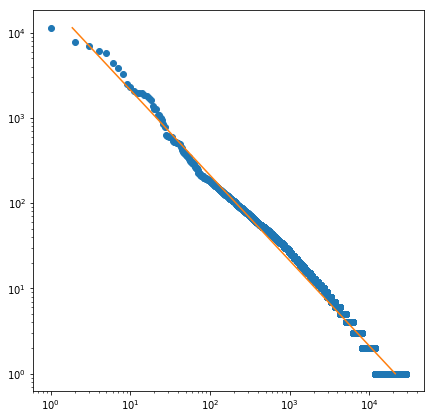

In [9]:
# Foi-se necessário calcular, pois na questão 2, eu fiz para os 50
# maiores, enquanto que nesste eu faço para todos os itens.
frequencias = [ocorrencia for nome, ocorrencia in counter_palavras_ordenadas_ocorrencia]
frequencias_medias = map(lambda frequencia: float(frequencia) / total_ocorrencia_palavras, frequencias)
ranking_total = range(1, len(frequencias) + 1)
frequencias_porcentagem = map(lambda frequencia: frequencia * 100, frequencias_medias)
pr_r = map(lambda (i, frequencia_media): (i+1) * frequencia_media, enumerate(frequencias_medias))

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")

predicao = np.mean(pr_r) / frequencias_medias

plt.plot(ranking_total, frequencias, linestyle="", marker="o")
plt.plot(predicao, frequencias, linestyle="-", marker="")

plt.show()

## Questão 4

In [10]:
def get_qtd_palavras(qtd_ocorrencias):
    palavras_ocorrentes = [palavra for palavra, ocorrencias in counter_palavras.iteritems() if ocorrencias == qtd_ocorrencias]
    return len(palavras_ocorrentes)

palavras_por_ocorrencias = []
for i in range(1, 11):
    palavras_por_ocorrencias.append(get_qtd_palavras(i))
    
numero_ocorrencias = range(1, 11)
proporcao_prevista = [round(1.0/(n*(n+1)), 3) for n in numero_ocorrencias]
proporcao_atual = [round(float(qtd_palavras_ocor)/tamanho_vocabulario, 3) for qtd_palavras_ocor in palavras_por_ocorrencias]
numero_palavras_atual = palavras_por_ocorrencias

colunas = ["Number of Occurrences (n)", "Predicted Proportion  (1/n(n+1))", "Actual Porportion", "Actual Number of Words"]

tabela_questao_4 = pd.DataFrame({"Number of Occurrences (n)": numero_ocorrencias, 
                                 "Predicted Proportion  (1/n(n+1))": proporcao_prevista,
                                 "Actual Porportion": proporcao_atual,
                                 "Actual Number of Words": numero_palavras_atual
                                })
tabela_questao_4 = tabela_questao_4.reindex(columns=colunas)

tabela_questao_4

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Porportion,Actual Number of Words
0,1,0.500,0.589,17045
1,2,0.167,0.134,3863
2,3,0.083,0.062,1783
3,4,0.050,0.040,1150
4,5,0.033,0.027,793
5,6,0.024,0.019,548
6,7,0.018,0.015,425
7,8,0.014,0.012,343
8,9,0.011,0.010,289
9,10,0.009,0.008,245
